# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
import sys
!{sys.executable} -m pip install citipy

#import citipy

import json


### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
units = "metric"

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Build partial query URL

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Define an empty list to fetch the weather data for each city
city_data = []

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q="    
    
 #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
  
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather1 = city_weather["weather"]["main"]
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_weather1 = requests.get(city_url + city).json()

        city_lat = city_weather1["coord"]["lat"]
        city_lng = city_weather1["coord"]["lon"]
        city_max_temp = city_weather1["main"]["temp_max"]
        city_humidity = city_weather1["main"]["humidity"]
        city_clouds = city_weather1["clouds"]["all"]
        city_wind = city_weather1["wind"]["speed"]
        city_country = city_weather1["sys"]["country"]
        city_date = city_weather1["dt"]
  
  
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                           }) 
    except:
        print("City not found. Skipping...")
        pass
              
print("Indicate that Data Loading is complete") 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


weather_data = pd.DataFrame(city_data)

#print(city_data)

weather_data.head()



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | kingsbridge
Processing Record 8 of Set 1 | kafir qala
Processing Record 9 of Set 1 | san juan
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | opuwo
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | reyes
Processing Record 15 of Set 1 | coronel dorrego
Processing Record 16 of Set 1 | la passe
Processing Record 17 of Set 1 | mae hong son
Processing Record 18 of Set 1 | tazacorte
Processing Record 19 of Set 1 | nuuk
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | merizo village
Processing Record 22 of Set 1 | kayes
Processing Record 23 of Se

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,16.56,52,75,3.60,CA,1691648788
1,ushuaia,-54.8000,-68.3000,4.81,81,0,2.57,AR,1691649034
2,adamstown,-25.0660,-130.1015,19.78,54,92,8.89,PN,1691649034
3,yellowknife,62.4560,-114.3525,18.29,55,100,3.60,CA,1691649034
4,grytviken,-54.2811,-36.5092,-5.35,88,91,1.08,GS,1691649034


In [13]:
#Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)


city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,16.56,52,75,3.60,CA,1691648788
1,ushuaia,-54.8000,-68.3000,4.81,81,0,2.57,AR,1691649034
2,adamstown,-25.0660,-130.1015,19.78,54,92,8.89,PN,1691649034
3,yellowknife,62.4560,-114.3525,18.29,55,100,3.60,CA,1691649034
4,grytviken,-54.2811,-36.5092,-5.35,88,91,1.08,GS,1691649034


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,16.56,52,75,3.60,CA,1691648788
1,ushuaia,-54.8000,-68.3000,4.81,81,0,2.57,AR,1691649034
2,adamstown,-25.0660,-130.1015,19.78,54,92,8.89,PN,1691649034
3,yellowknife,62.4560,-114.3525,18.29,55,100,3.60,CA,1691649034
4,grytviken,-54.2811,-36.5092,-5.35,88,91,1.08,GS,1691649034


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig1.png'

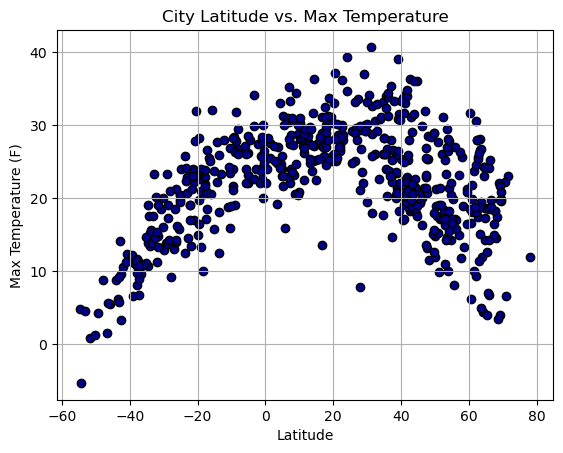

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"] ,city_data_df["Max Temp"] ,edgecolors="black" ,facecolors="darkblue")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

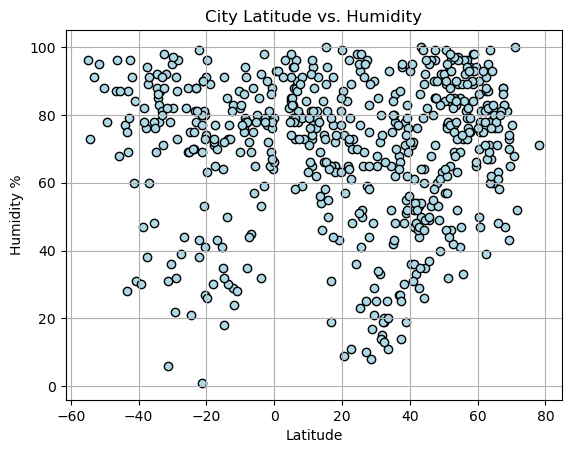

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"] ,city_data_df["Humidity"] ,edgecolors="black" ,facecolors="darkblue")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

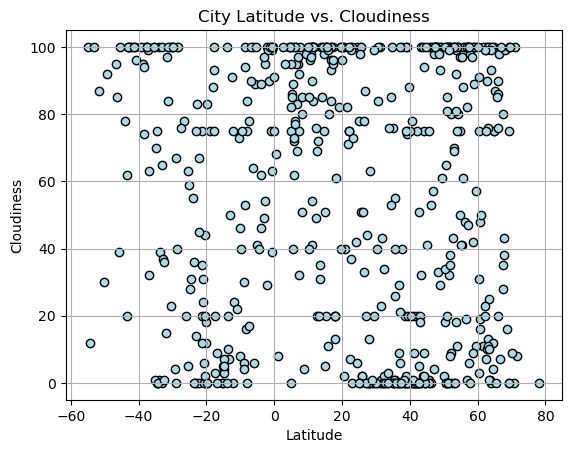

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"] ,city_data_df["Cloudiness"] ,edgecolors="black" ,facecolors="darkblue")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

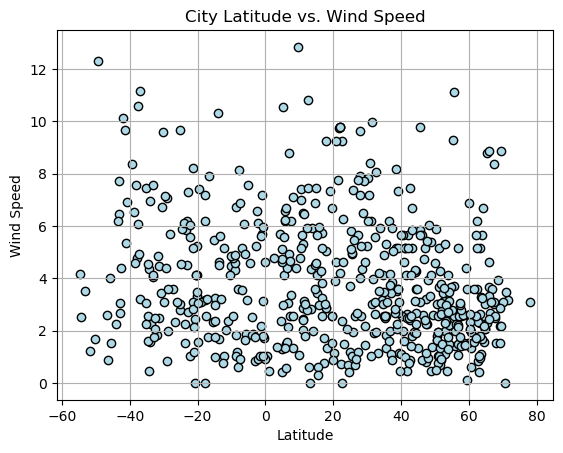

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"] ,city_data_df["Wind Speed"] ,edgecolors="black" ,facecolors="darkblue")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
slope1, intercept1, r_value1 , p_value1, std_err1 = linregress(city_data_df["Lat"], city_data_df["Max Temp"])

line_eq_Lat_MaxTemp = "y = " + str(round(slope1,3)) + "x + " + str(round(intercept1,2))

print(line_eq_Lat_MaxTemp)

slope2, intercept2, r_value2 , p_value2, std_err2 = linregress(city_data_df["Lat"], city_data_df["Humidity"])

line_eq_Lat_Humidity = "y = " + str(round(slope2,3)) + "x + " + str(round(intercept2,2))

print(line_eq_Lat_Humidity)

slope3, intercept3, r_value3 , p_value3, std_err3 = linregress(city_data_df["Lat"], city_data_df["Cloudiness"])

line_eq_Lat_Cloudiness = "y = " + str(round(slope3,3)) + "x + " + str(round(intercept3,2))

print(line_eq_Lat_Cloudiness)

slope4, intercept4, r_value4 , p_value4, std_err4 = linregress(city_data_df["Lat"], city_data_df["Wind Speed"])

line_eq_Lat_WindSpeed = "y = " + str(round(slope4,3)) + "x + " + str(round(intercept4,2))

print(line_eq_Lat_WindSpeed)



y = 0.005x + 21.37
y = -0.006x + 70.04
y = -0.089x + 55.74
y = -0.014x + 4.02


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
city_data_LatGT0_df = city_data_df[(city_data_df["Lat"] >= 0)] 

city_data_LatGT0_df = city_data_LatGT0_df.reset_index(drop=True)

# Display sample data
city_data_LatGT0_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,21.44,79,75,2.06,US,1691615424
1,timbuktu,16.7735,-3.0074,36.59,31,84,3.80,ML,1691615541
2,san juan del sur,11.2529,-85.8705,30.10,65,100,6.51,NI,1691615541
3,stanley,54.8680,-1.6985,17.66,85,75,2.06,GB,1691615542
4,san luis de la loma,17.2706,-100.8939,29.83,77,100,0.75,MX,1691615547


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
city_data_df_LatLE0_df = city_data_df.loc[(city_data_df["Lat"] < 0)] 
city_data_LatLE0_df = city_data_df_LatLE0_df.reset_index(drop=True)

# Display sample data
city_data_df_LatLE0_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cannonvale,-20.2833,148.7000,19.66,80,44,5.22,AU,1691615540
1,hermanus,-34.4187,19.2345,13.00,85,0,4.36,ZA,1691615540
2,port-aux-francais,-49.3500,70.2167,2.65,78,92,12.29,TF,1691615540
3,waitangi,-43.9535,-176.5597,9.90,77,78,2.24,NZ,1691615540
4,iquique,-20.2208,-70.1431,19.02,74,12,4.12,CL,1691615498


###  Temperature vs. Latitude Linear Regression Plot

 The r-value is -0.69


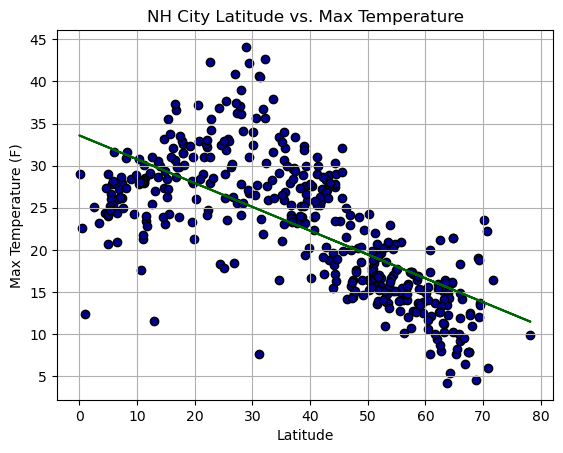

In [ ]:
# Linear regression on Northern Hemisphere
slope5, intercept5, r_value5 , p_value5, std_err5 = linregress(city_data_LatGT0_df["Lat"], city_data_LatGT0_df["Max Temp"])

regress_values1 = city_data_LatGT0_df["Lat"] * slope5 + intercept5

print(f' The r-value is {round(st.pearsonr(city_data_LatGT0_df["Lat"], city_data_LatGT0_df["Max Temp"])[0],2)}') 

plt.scatter(city_data_LatGT0_df["Lat"] ,city_data_LatGT0_df["Max Temp"] ,edgecolors="black" ,facecolors="darkblue")

plt.plot(city_data_LatGT0_df["Lat"], regress_values1, color = "darkgreen")

# Incorporate the other graph properties
plt.title("NH City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

 The r-value is 0.78


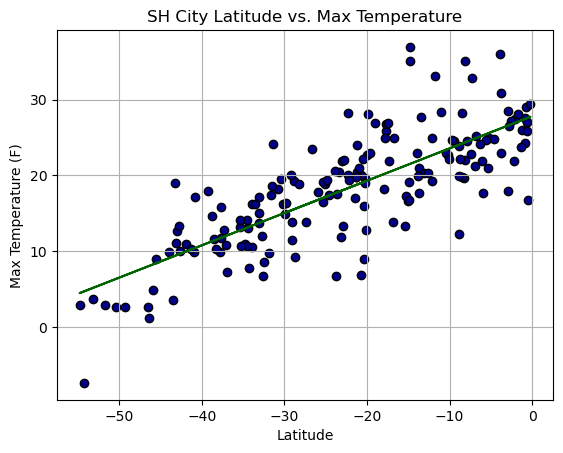

In [ ]:
# Linear regression on Southern Hemisphere


slope6, intercept6, r_value6 , p_value6, std_err6 = linregress(city_data_LatLE0_df["Lat"], city_data_LatLE0_df["Max Temp"])

regress_values2 = city_data_LatLE0_df["Lat"] * slope6 + intercept6

print(f' The r-value is {round(st.pearsonr(city_data_LatLE0_df["Lat"], city_data_LatLE0_df["Max Temp"])[0],2)}') 

plt.scatter(city_data_LatLE0_df["Lat"] ,city_data_LatLE0_df["Max Temp"] ,edgecolors="black" ,facecolors="darkblue")

plt.plot(city_data_LatLE0_df["Lat"], regress_values2, color = "darkgreen")

# Incorporate the other graph properties
plt.title("SH City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#looking between the correlations for both southern & northern hemispheres. There is a direct positive relationship between temperture & greater latitudes in southern hemispheres
# and a negative correlation between tempertures & greater latitudes in the northern hemiosphere. From this alone it can be concluded that latitudes between -10 to 10 hold the hottest
# tempertures. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.03


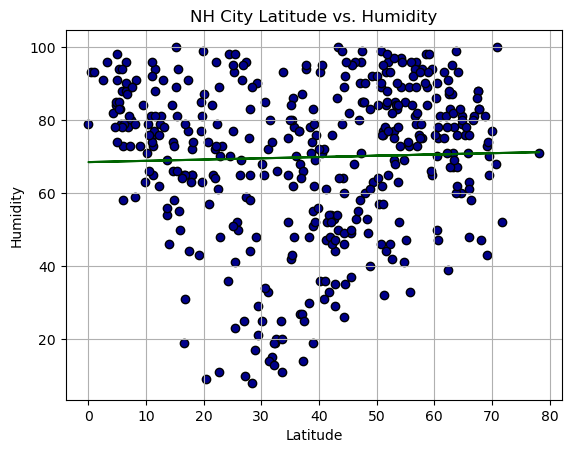

In [ ]:
# Northern Hemisphere

slope7, intercept7, r_value7 , p_value7, std_err7 = linregress(city_data_LatGT0_df["Lat"], city_data_LatGT0_df["Humidity"])

regress_values3 = city_data_LatGT0_df["Lat"] * slope7 + intercept7

print(f'The r-value is {round(st.pearsonr(city_data_LatGT0_df["Lat"], city_data_LatGT0_df["Humidity"])[0],2)}') 

plt.scatter(city_data_LatGT0_df["Lat"] ,city_data_LatGT0_df["Humidity"] ,edgecolors="black" ,facecolors="darkblue")

plt.plot(city_data_LatGT0_df["Lat"], regress_values3, color = "darkgreen")

# Incorporate the other graph properties
plt.title("NH City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()


The r-value is -0.11


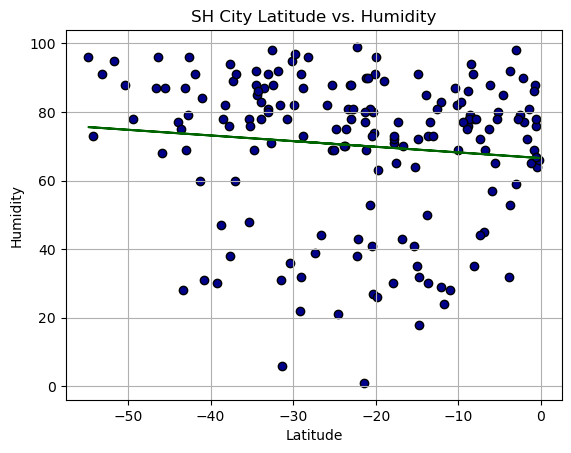

In [ ]:
# Southern Hemisphere

slope8, intercept8, r_value8 , p_value8, std_err8 = linregress(city_data_LatLE0_df["Lat"], city_data_LatLE0_df["Humidity"])

regress_values4 = city_data_LatLE0_df["Lat"] * slope8 + intercept8

print(f'The r-value is {round(st.pearsonr(city_data_LatLE0_df["Lat"], city_data_LatLE0_df["Humidity"])[0],2)}') 

plt.scatter(city_data_LatLE0_df["Lat"] ,city_data_LatLE0_df["Humidity"] ,edgecolors="black" ,facecolors="darkblue")

plt.plot(city_data_LatLE0_df["Lat"], regress_values4, color = "darkgreen")

# Incorporate the other graph properties
plt.title("SH City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# From observing these two charts, it seems that there is no relationship between humidity and lattitudes.
#  Both r-values in these two charts feature a low number.    


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.13


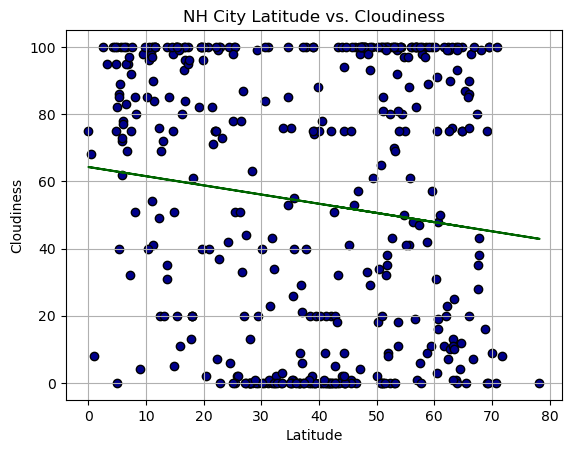

In [ ]:
# Northern Hemisphere

slope9, intercept9, r_value9 , p_value9, std_err9 = linregress(city_data_LatGT0_df["Lat"], city_data_LatGT0_df["Cloudiness"])

regress_values5 = city_data_LatGT0_df["Lat"] * slope9 + intercept9

print(f'The r-value is {round(st.pearsonr(city_data_LatGT0_df["Lat"], city_data_LatGT0_df["Cloudiness"])[0],2)}') 

plt.scatter(city_data_LatGT0_df["Lat"] ,city_data_LatGT0_df["Cloudiness"] ,edgecolors="black" ,facecolors="darkblue")

plt.plot(city_data_LatGT0_df["Lat"], regress_values5, color = "darkgreen")

# Incorporate the other graph properties
plt.title("NH City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()



The r-value is -0.12


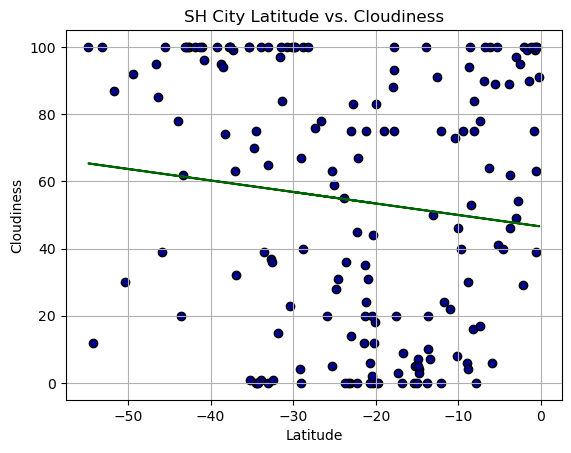

In [ ]:
# Southern Hemisphere

slope10, intercept10, r_value10, p_value10, std_err10 = linregress(city_data_LatLE0_df["Lat"], city_data_LatLE0_df["Cloudiness"])

regress_values6 = city_data_LatLE0_df["Lat"] * slope10 + intercept10

print(f'The r-value is {round(st.pearsonr(city_data_LatLE0_df["Lat"], city_data_LatLE0_df["Cloudiness"])[0],2)}') 

plt.scatter(city_data_LatLE0_df["Lat"] ,city_data_LatLE0_df["Cloudiness"] ,edgecolors="black" ,facecolors="darkblue")

plt.plot(city_data_LatLE0_df["Lat"], regress_values6, color = "darkgreen")

# Incorporate the other graph properties
plt.title("SH City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** #YOUR RESPONSE HERE

# From observing these two charts, it seems that there is no relationship between Cloudiness and lattitudes.
#  It seems that much of the data features extreme outliers in both high and to no cloudiness. Both r-values in these two charts feature a low number.    



### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.23


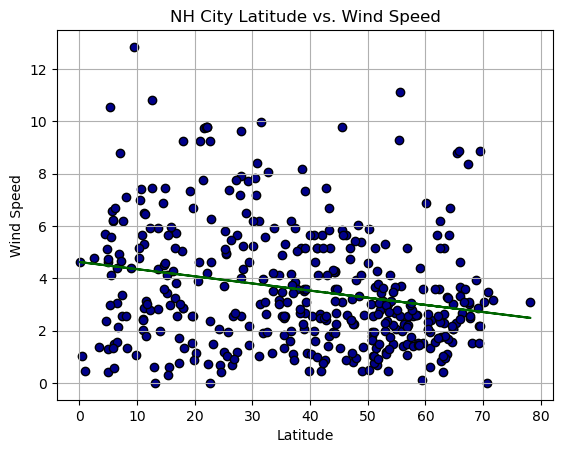

In [ ]:
# Northern Hemisphere
slope11, intercept11, r_value11 , p_value11, std_err11 = linregress(city_data_LatGT0_df["Lat"], city_data_LatGT0_df["Wind Speed"])

regress_values7 = city_data_LatGT0_df["Lat"] * slope11 + intercept11

print(f'The r-value is {round(st.pearsonr(city_data_LatGT0_df["Lat"], city_data_LatGT0_df["Wind Speed"])[0],2)}') 

plt.scatter(city_data_LatGT0_df["Lat"] ,city_data_LatGT0_df["Wind Speed"] ,edgecolors="black" ,facecolors="darkblue")

plt.plot(city_data_LatGT0_df["Lat"], regress_values7, color = "darkgreen")

# Incorporate the other graph properties
plt.title("NH City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()


The r-value is -0.18


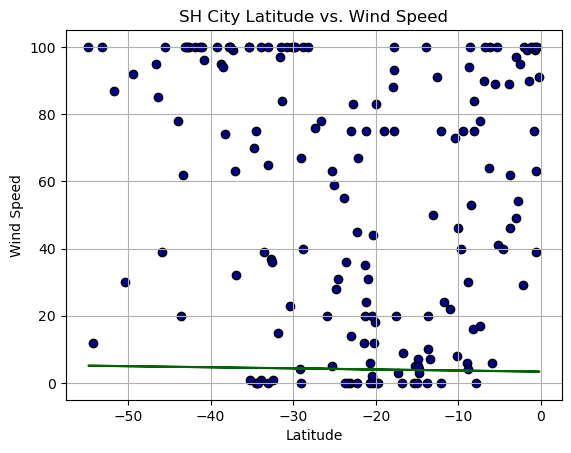

In [ ]:
# Southern Hemisphere

slope12, intercept12, r_value12, p_value12, std_err12 = linregress(city_data_LatLE0_df["Lat"], city_data_LatLE0_df["Wind Speed"])

regress_values8 = city_data_LatLE0_df["Lat"] * slope12 + intercept12

print(f'The r-value is {round(st.pearsonr(city_data_LatLE0_df["Lat"], city_data_LatLE0_df["Wind Speed"])[0],2)}') 

plt.scatter(city_data_LatLE0_df["Lat"] ,city_data_LatLE0_df["Cloudiness"] ,edgecolors="black" ,facecolors="darkblue")

plt.plot(city_data_LatLE0_df["Lat"], regress_values8, color = "darkgreen")

# Incorporate the other graph properties
plt.title("SH City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()



**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# From observing these two charts, it seems that there is no relationship between Windspeed and lattitudes.
# It seems that much of the data seems to be concentrated in extreme outliers in both high and low in wind speeds.    